In [53]:
import pandas as pd 
import numpy as np
data = {'Prov':['ON', 'AB', 'ON', 'AB','ON', 'AB', 'ON', 'AB'], 'GDP':[20, 31, 19, 28,15, 25, 13, 22], 'Year':[2019, 2019, 2019, 2019,2020, 2020, 2020, 2020], 'Half':['H1', 'H1', 'H2', 'H2','H1', 'H1', 'H2', 'H2']} 
df = pd.DataFrame(data) 
df.to_csv('leaning.csv', index=False)

In [54]:
df

,Prov,GDP,Year,Half
0,ON,20,2019,H1
1,AB,31,2019,H1
2,ON,19,2019,H2
3,AB,28,2019,H2
4,ON,15,2020,H1
5,AB,25,2020,H1
6,ON,13,2020,H2
7,AB,22,2020,H2


In [55]:
#multi-index group by while lenghtening(unstacking) one column (can't use mean,)
df1=df.groupby(['Year', 'Half', 'Prov'])['GDP'].sum().unstack('Prov')
df.groupby(['Year', 'Half', 'Prov'])['GDP'].sum().unstack('Prov')


Prov       AB  ON
Year Half        
2019 H1    31  20
     H2    28  19
2020 H1    25  15
     H2    22  13

In [56]:
# pivot-table option for above 
df.pivot_table(
        values='GDP', 
        index=['Year', 'Half'], 
        columns='Prov', 
        aggfunc=np.sum)

Prov       AB  ON
Year Half        
2019 H1    31  20
     H2    28  19
2020 H1    25  15
     H2    22  13

<AxesSubplot:xlabel='Year,Half'>

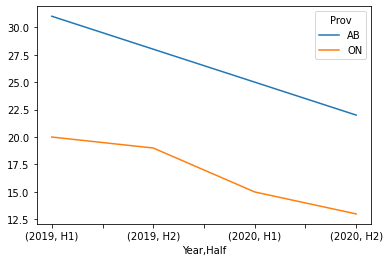

In [57]:
df1.plot()

In [58]:
#same as ^above, but ignoring/smoothening over half year results (can do mean)
df2=df.groupby(['Year','Prov'])['GDP'].agg('mean').unstack('Prov')
df.groupby(['Year','Prov'])['GDP'].agg('mean').unstack('Prov')

Prov,AB,ON
Year,,
2019,29.5,19.5
2020,23.5,14.0


In [59]:
#same as ^above, with pivot table
df.pivot_table(
        values='GDP', 
        index=['Year'], 
        columns='Prov', 
        aggfunc=np.mean)

Prov,AB,ON
Year,,
2019,29.5,19.5
2020,23.5,14.0


<AxesSubplot:xlabel='Year'>

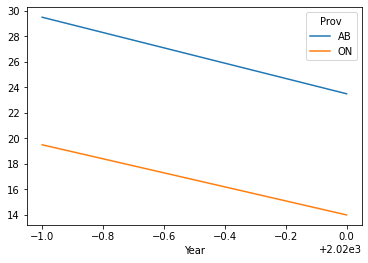

In [60]:
df2.plot()